# Employee Promotion Prediction Model Training

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# import tensorflow as tf
import lime
from lime import lime_tabular
import shap
from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler

C:\Users\abhir\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_emp=pd.read_csv('data/train_test_merged_data_cleaned.csv')

In [4]:
df_emp.head()

,Unnamed: 0,department,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,7,2,1,35,5.0,8,0,49,0.0,0,0,1
1,1,4,0,1,30,5.0,4,0,60,0.0,1,0,0
2,2,7,0,1,34,3.0,7,0,50,0.0,1,0,1
3,3,7,0,2,39,1.0,10,0,50,0.0,1,0,0
4,4,8,0,1,45,3.0,2,0,73,0.0,1,0,0


In [5]:
df_emp=df_emp.drop('Unnamed: 0', axis=1)

In [6]:
df_emp.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,7,2,1,35,5.0,8,0,49,0.0,0,0,1
1,4,0,1,30,5.0,4,0,60,0.0,1,0,0
2,7,0,1,34,3.0,7,0,50,0.0,1,0,1
3,7,0,2,39,1.0,10,0,50,0.0,1,0,0
4,8,0,1,45,3.0,2,0,73,0.0,1,0,0


### Split the merged dataset into the original Train and Test data

In [7]:
# Select the original train dataset
train_data_final = df_emp.iloc[:54808, :]

# Select the original test dataset
test_data_final = df_emp.iloc[54808:, :]


In [8]:
train_data_final.shape

(54808, 12)

In [9]:
train_data_final.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,7,2,1,35,5.0,8,0,49,0.0,0,0,1
1,4,0,1,30,5.0,4,0,60,0.0,1,0,0
2,7,0,1,34,3.0,7,0,50,0.0,1,0,1
3,7,0,2,39,1.0,10,0,50,0.0,1,0,0
4,8,0,1,45,3.0,2,0,73,0.0,1,0,0


In [10]:
test_data_final.shape

(23490, 12)

In [11]:
test_data_final.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
54808,8,0,1,24,3.0,1,0,77,NaN,1,0,1
54809,2,0,1,31,3.0,5,0,51,NaN,0,0,0
54810,7,0,1,31,1.0,4,0,47,NaN,1,0,0
54811,5,0,3,31,2.0,9,0,65,NaN,0,0,0
54812,1,0,1,30,4.0,7,0,61,NaN,1,0,1


### Creating Independent and Dependent variables

In [12]:
x=train_data_final.drop('is_promoted', axis=1)
x

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,7,2,1,35,5.0,8,0,49,0,0,1
1,4,0,1,30,5.0,4,0,60,1,0,0
2,7,0,1,34,3.0,7,0,50,1,0,1
3,7,0,2,39,1.0,10,0,50,1,0,0
4,8,0,1,45,3.0,2,0,73,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
54803,8,0,1,48,3.0,15,0,78,1,0,1
54804,4,2,1,37,2.0,6,0,56,0,0,0
54805,0,0,1,27,5.0,3,0,79,1,0,0
54806,7,0,1,29,1.0,2,0,45,1,0,1


In [13]:
y=train_data_final['is_promoted']
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
54803    0.0
54804    0.0
54805    0.0
54806    0.0
54807    0.0
Name: is_promoted, Length: 54808, dtype: float64

In [14]:
y.value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

<BarContainer object of 2 artists>

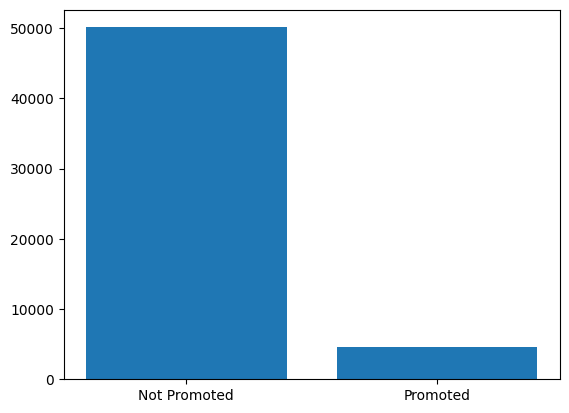

In [15]:
class_names = ['Not Promoted', 'Promoted']
plt.bar(class_names, y.value_counts())

### SMOTEEN

In [16]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y)

In [17]:
y_resampled.value_counts()

1.0    46649
0.0    34870
Name: is_promoted, dtype: int64

<BarContainer object of 2 artists>

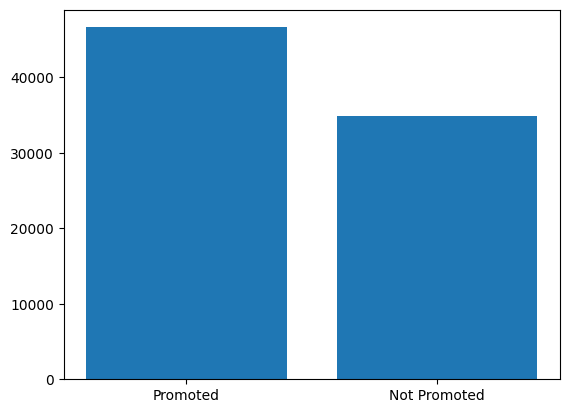

In [18]:
class_names = ['Promoted', 'Not Promoted']
plt.bar(class_names, y_resampled.value_counts())

### Train-test split

In [19]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

### Standardization of Data

In [20]:
minmax_scaler=MinMaxScaler()
standard_scaler=StandardScaler()

In [21]:
standard_scaler_fit=standard_scaler.fit(xr_train)
xr_train=standard_scaler_fit.transform(xr_train)
xr_test=standard_scaler_fit.transform(xr_test)

In [22]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

### Model Training

#### Logistic Regression

In [23]:
model_lor = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Creating the model on Training Data
model_lor_fit=model_lor.fit(xr_train,yr_train)
model_lor_pred=model_lor_fit.predict(xr_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(yr_test, model_lor_pred))
print(metrics.confusion_matrix(yr_test, model_lor_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(yr_test, model_lor_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


              precision    recall  f1-score   support

         0.0       0.71      0.65      0.68     10450
         1.0       0.76      0.81      0.78     14006

    accuracy                           0.74     24456
   macro avg       0.74      0.73      0.73     24456
weighted avg       0.74      0.74      0.74     24456

[[ 6800  3650]
 [ 2718 11288]]
Accuracy of the model on Testing Sample Data: 0.74


#### Decision Tree Classifier

In [24]:
model_dt = DecisionTreeClassifier(criterion = "gini",random_state = 100, max_depth=10, min_samples_leaf=8)

# Creating the model on Training Data
model_dt_fit=model_dt.fit(xr_train,yr_train)
model_dt_pred=model_dt_fit.predict(xr_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(yr_test, model_dt_pred))
print(metrics.confusion_matrix(yr_test, model_dt_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(yr_test, model_dt_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82     10450
         1.0       0.90      0.81      0.85     14006

    accuracy                           0.84     24456
   macro avg       0.84      0.84      0.84     24456
weighted avg       0.85      0.84      0.84     24456

[[ 9218  1232]
 [ 2701 11305]]
Accuracy of the model on Testing Sample Data: 0.84


#### Random Forest Classifier

In [25]:
model_rf = RandomForestClassifier(max_depth=12, n_estimators=200, criterion='entropy')

# Creating the model on Training Data
model_rf_fit=model_rf.fit(xr_train,yr_train)
model_rf_pred=model_rf_fit.predict(xr_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(yr_test, model_rf_pred))
print(metrics.confusion_matrix(yr_test, model_rf_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(yr_test, model_rf_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85     10450
         1.0       0.88      0.90      0.89     14006

    accuracy                           0.87     24456
   macro avg       0.87      0.87      0.87     24456
weighted avg       0.87      0.87      0.87     24456

[[ 8717  1733]
 [ 1453 12553]]
Accuracy of the model on Testing Sample Data: 0.87


#### AdaBoost Classifier

In [26]:
dt=DecisionTreeClassifier(max_depth=8)
model_ada = AdaBoostClassifier(n_estimators=200, estimator=dt ,learning_rate=0.04)

# Creating the model on Training Data
model_ada_fit=model_ada.fit(xr_train,yr_train)
model_ada_pred=model_ada_fit.predict(xr_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(yr_test, model_ada_pred))
print(metrics.confusion_matrix(yr_test, model_ada_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(yr_test, model_ada_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     10450
         1.0       0.94      0.93      0.94     14006

    accuracy                           0.93     24456
   macro avg       0.93      0.93      0.93     24456
weighted avg       0.93      0.93      0.93     24456

[[ 9690   760]
 [  997 13009]]
Accuracy of the model on Testing Sample Data: 0.93


#### XGB Classifier

In [27]:
model_xgb = XGBClassifier(max_depth=15, learning_rate=0.04, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Creating the model on Training Data
model_xgb_fit=model_xgb.fit(xr_train,yr_train)
model_xgb_pred=model_xgb_fit.predict(xr_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(yr_test, model_xgb_pred))
print(metrics.confusion_matrix(yr_test, model_xgb_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(yr_test, model_xgb_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     10450
         1.0       0.95      0.94      0.95     14006

    accuracy                           0.94     24456
   macro avg       0.94      0.94      0.94     24456
weighted avg       0.94      0.94      0.94     24456

[[ 9771   679]
 [  848 13158]]
Accuracy of the model on Testing Sample Data: 0.94


#### KNearestNeighbor Classifier

In [28]:
# model_knn = KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree')

# # Creating the model on Training Data
# model_knn_fit=model_knn.fit(xr_train,yr_train)
# model_knn_pred=model_knn_fit.predict(xr_test)

# # Measuring accuracy on Testing Data
# print(metrics.classification_report(yr_test, model_knn_pred))
# print(metrics.confusion_matrix(yr_test, model_knn_pred))

# # Printing the Overall Accuracy of the model
# F1_Score=metrics.f1_score(yr_test, model_knn_pred, average='weighted')
# print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

#### Support Vector Classfier

In [29]:
# model_svc = SVC()

# # Creating the model on Training Data
# model_svc_fit=model_svc.fit(xr_train,yr_train)
# model_svc_pred=model_svc_fit.predict(xr_test)

# # Measuring accuracy on Testing Data
# print(metrics.classification_report(yr_test, model_svc_pred))
# print(metrics.confusion_matrix(yr_test, model_svc_pred))

# # Printing the Overall Accuracy of the model
# F1_Score=metrics.f1_score(yr_test, model_svc_pred, average='weighted')
# print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

#### Gaussian Naive Bayes Classifier

In [30]:
# model_gnb = GaussianNB()

# # Creating the model on Training Data
# model_gnb_fit=model_gnb.fit(xr_train,yr_train)
# model_gnb_pred=model_gnb_fit.predict(xr_test)

# # Measuring accuracy on Testing Data
# print(metrics.classification_report(yr_test, model_gnb_pred))
# print(metrics.confusion_matrix(yr_test, model_gnb_pred))

# # Printing the Overall Accuracy of the model
# F1_Score=metrics.f1_score(yr_test, model_gnb_pred, average='weighted')
# print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

#### LIME (Local Interpretable Model-agnostic Explanations) and SHAP (SHapley Additive exPlanation) for XGBoost Classifier

In [52]:
test_1 = xr_train.iloc[40]

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(xr_train),
    feature_names=xr_train.columns,
    class_names=['not promoted', 'promoted'],
    mode='classification', verbose=True
)


In [53]:
lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=model_xgb_fit.predict_proba, num_features=11
)


Intercept 0.985758206497054
Prediction_local [0.99687483]
Right: 0.99299735


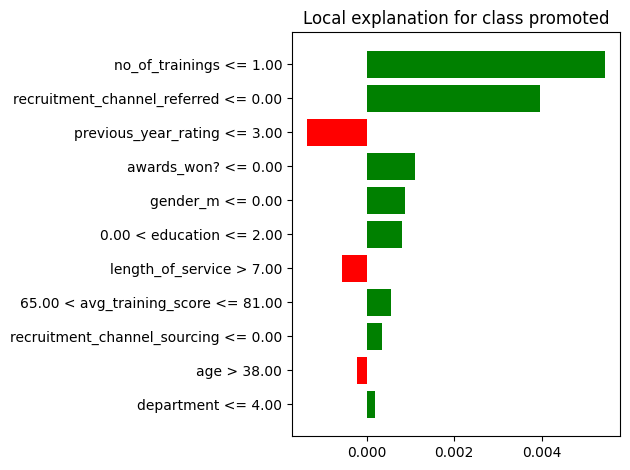

In [54]:
plt=lime_exp.as_pyplot_figure()
plt.tight_layout()

In [55]:
lime_exp.show_in_notebook(show_table=True)


In [35]:
import shap
shap.initjs()

In [56]:
shap_explainer = shap.TreeExplainer(model_xgb_fit)
shap_values = shap_explainer.shap_values(x_resampled)

In [57]:
shap.force_plot(shap_explainer.expected_value, shap_values[1, :], test_1)

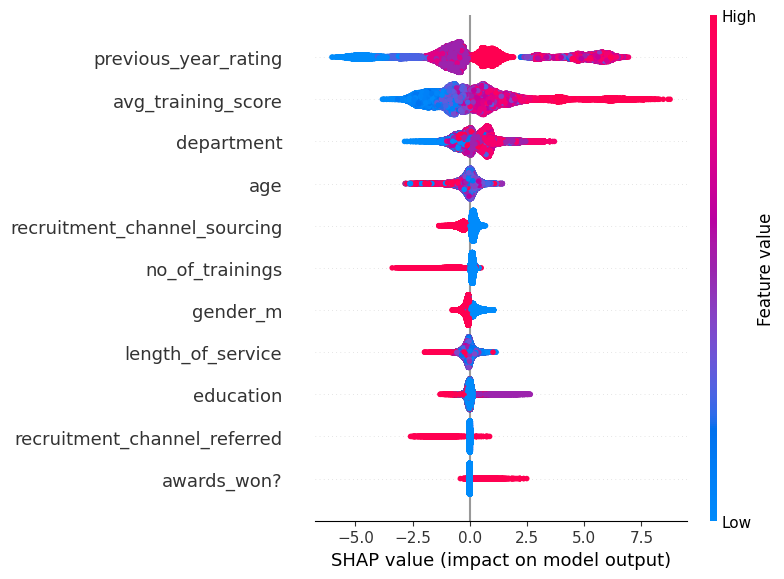

In [58]:
shap.summary_plot(shap_values, x_resampled)

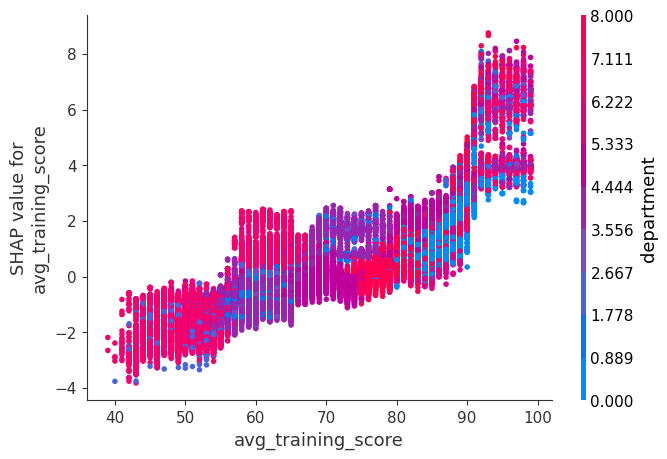

In [59]:
shap.dependence_plot('avg_training_score', shap_values, x_resampled)

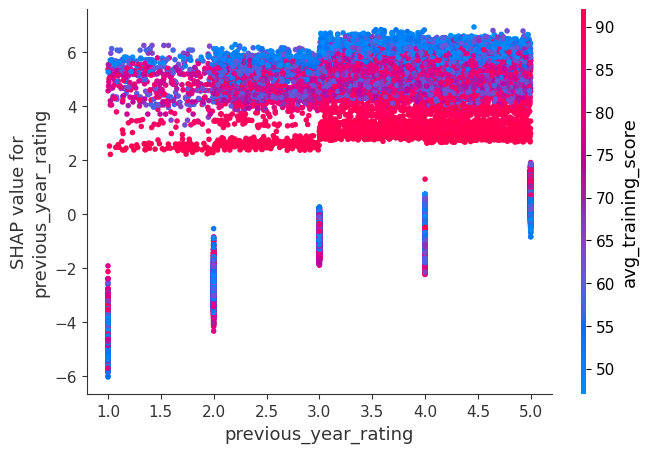

In [60]:
shap.dependence_plot('previous_year_rating', shap_values, x_resampled)

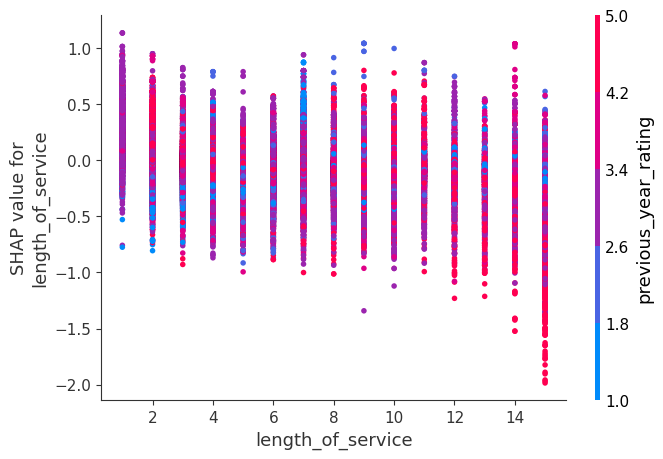

In [61]:
shap.dependence_plot('length_of_service', shap_values, x_resampled)

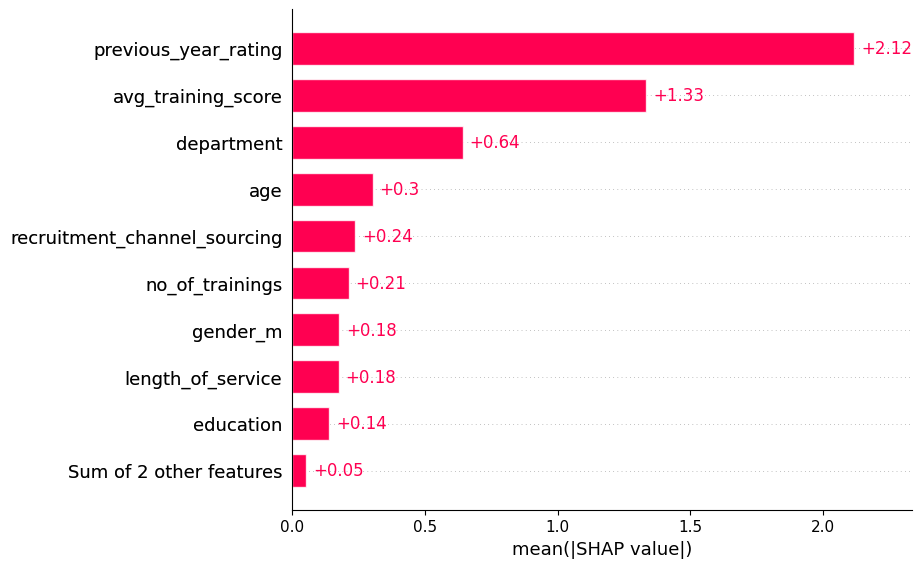

In [42]:
explainer = shap.Explainer(model_xgb_fit)
shap_values = explainer(x_resampled)
shap.plots.bar(shap_values)

In [43]:
prediction = model_xgb.predict(np.array([[7, #department
                                      2, #education
                                      1, #length of training
                                      50, # age
                                      1, #previous year rating
                                      15, #length of service
                                      0, #awards won
                                      51, #avg training score
                                      1, #gender
                                      0, #recruitment_referred
                                      1, #recruitment_sourcing
                                     ]]))
print("Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion :", prediction)

Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion : [0]
